<a href="https://colab.research.google.com/github/DaryaJavadi/Machine_learning_projects/blob/main/improved_LR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(path + "/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
# TASK 0.

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# TASK 1.

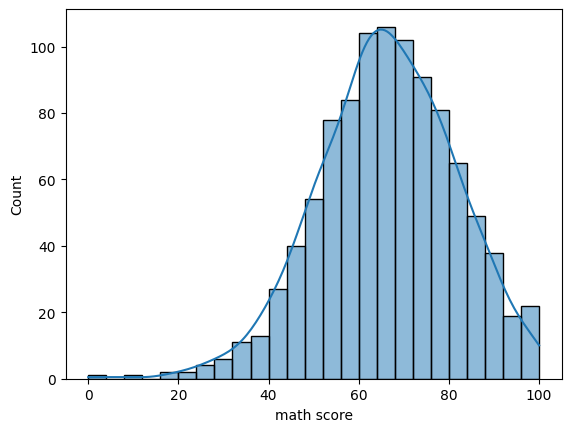

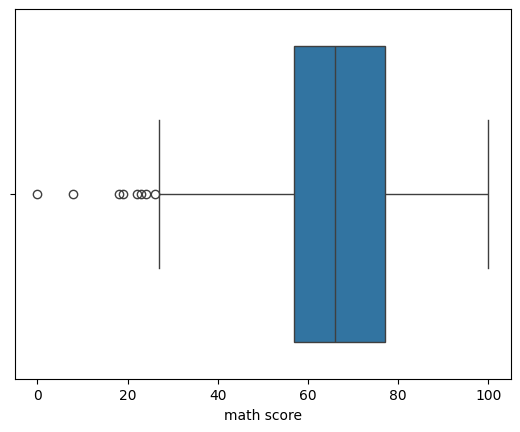

In [ ]:
# 1.
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["math score"], kde=True)
plt.show()

sns.boxplot(x=df["math score"])
plt.show()

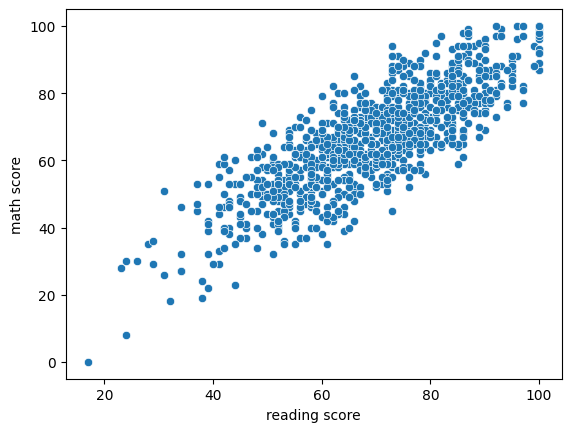

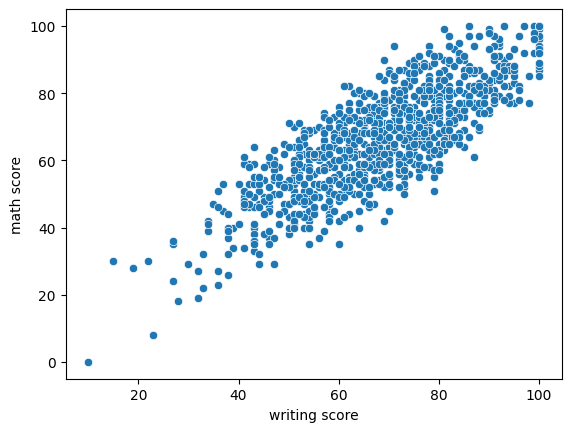

In [ ]:
# 2.
sns.scatterplot(x=df["reading score"], y=df["math score"])
plt.show()

sns.scatterplot(x=df["writing score"], y=df["math score"])
plt.show()

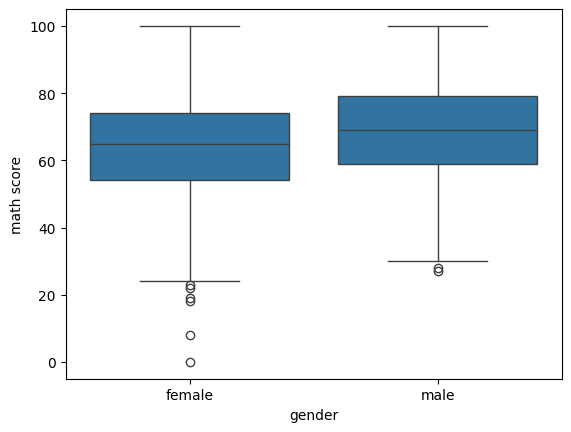

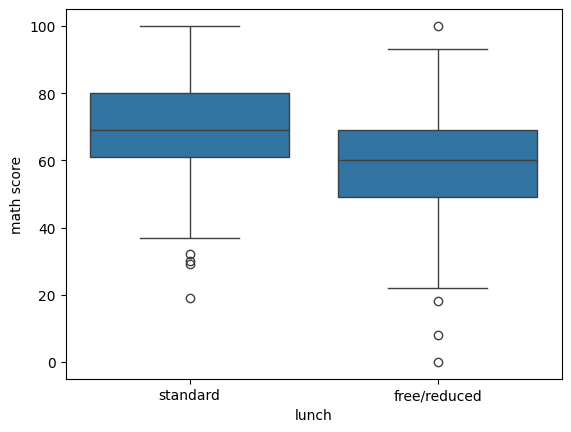

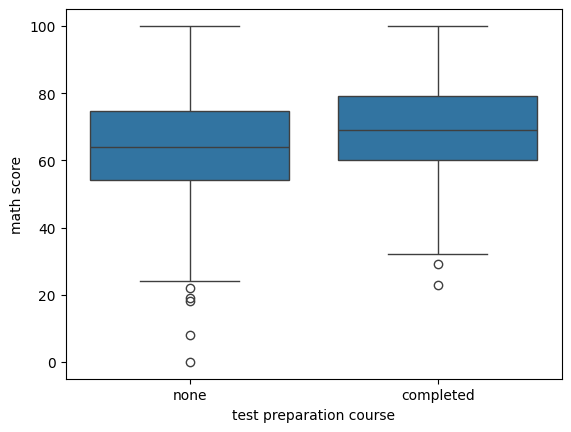

In [ ]:
# 3.
sns.boxplot(x="gender", y="math score", data=df)
plt.show()

sns.boxplot(x="lunch", y="math score", data=df)
plt.show()

sns.boxplot(x="test preparation course", y="math score", data=df)
plt.show()

In [ ]:
# TASK 2.

In [ ]:
# 1.
X = df.drop("math score", axis=1)
y = df["math score"]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [ ]:
# 2.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

numeric_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False))

])

# 3.
categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
# 4.
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

In [ ]:
# TASK 3.

In [ ]:
# 1.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# TASK 4.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [ ]:
# TASK 5.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Linear Regression
MAE: 4.175942962949607
RMSE: 5.3776529753735804
R2: 0.8811566463675922


In [ ]:
# RMSE is the most appropriate metric for this dataset.

# Because:

# it penalizes large prediction errors,
# it is easy to interpret in score units,
# it reflects real-world importance of big mistakes.

In [ ]:
# TASK 6.

#Ridge

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

ridge_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("Lasso R2:", r2_score(y_test, ridge_pred))

Ridge RMSE: 5.374119511717175
Lasso R2: 0.8813127705030557


#Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Lasso(alpha=0.01))
])

lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Lasso R2:", r2_score(y_test, lasso_pred))

Lasso RMSE: 5.374464733582324
Lasso R2: 0.8812975215891938


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    linear_model,
    X,
    y,
    scoring="neg_root_mean_squared_error",
    cv=5
)

print("CV RMSE Mean:", -cv_scores.mean())
print("CV RMSE Std:", cv_scores.std())

CV RMSE Mean: 5.402416250294022
CV RMSE Std: 0.21815270081446936


In [ ]:
cv_scores = cross_val_score(
    linear_model,
    X,
    y,
    scoring="r2",
    cv=5
)

print("CV R2 Mean:", cv_scores.mean())

CV R2 Mean: 0.8714411709520598


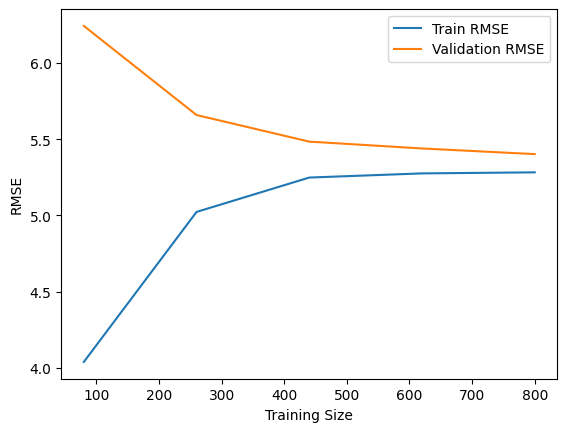

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    linear_model,
    X,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_rmse = -train_scores.mean(axis=1)
test_rmse = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_rmse, label="Train RMSE")
plt.plot(train_sizes, test_rmse, label="Validation RMSE")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend()
plt.show()